CORRELATION MATRIX VISUALIZATION

 Generating Sample Dataset: Student Performance Metrics
----------------------------------------------------------------------
Dataset created with 200 students and 9 features

First 5 rows:
   Study Hours  Sleep Hours  Exercise Hours  Social Hours  Math Score  \
0     5.993428     7.536681        0.202786      3.756989  100.000000   
1     4.723471     7.841177        0.700312      2.077835   88.731078   
2     6.295377     8.624577        1.002622      3.869606  100.000000   
3     8.046060     8.580703        1.023490      4.355638  100.000000   
4     4.531693     4.933496        0.774967      3.413435   78.881553   

   Science Score  English Score  Attendance %  GPA  
0      86.364062      91.865096         100.0  4.0  
1      77.113664      73.646328         100.0  4.0  
2      84.438531      94.106769         100.0  4.0  
3      92.558249     100.000000         100.0  4.0  
4      74.786029      81.185920         100.0  4.0  

DATASET STATISTIC

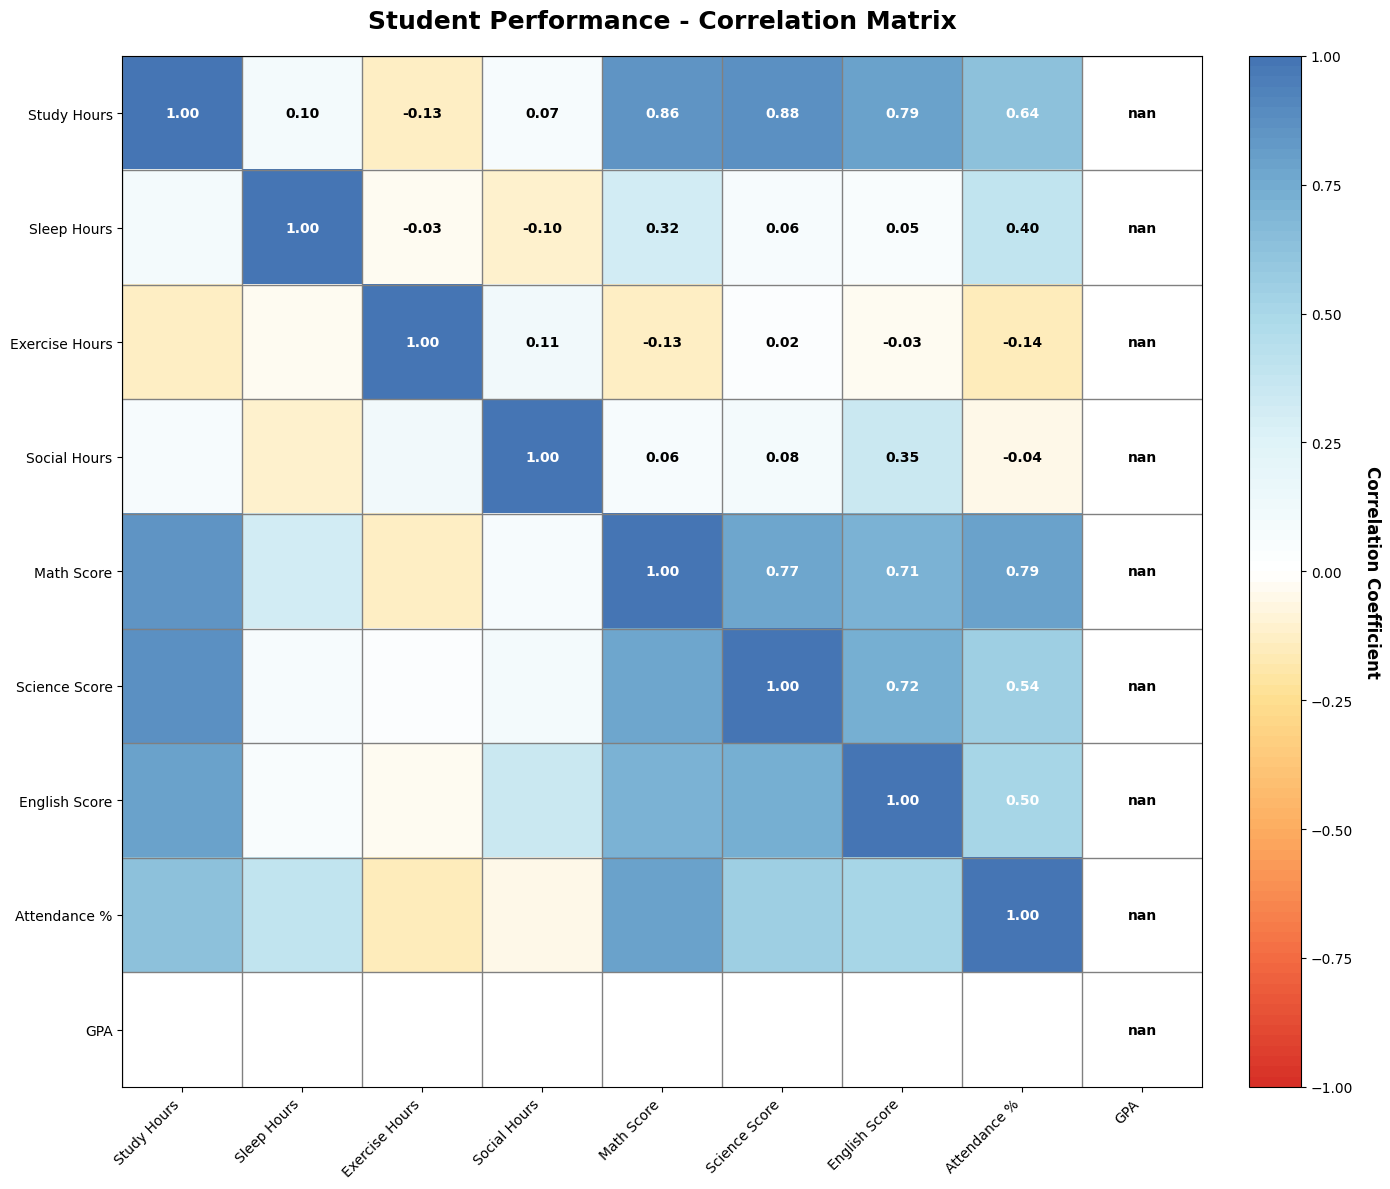


2. Creating Target Correlation Plot (GPA)...


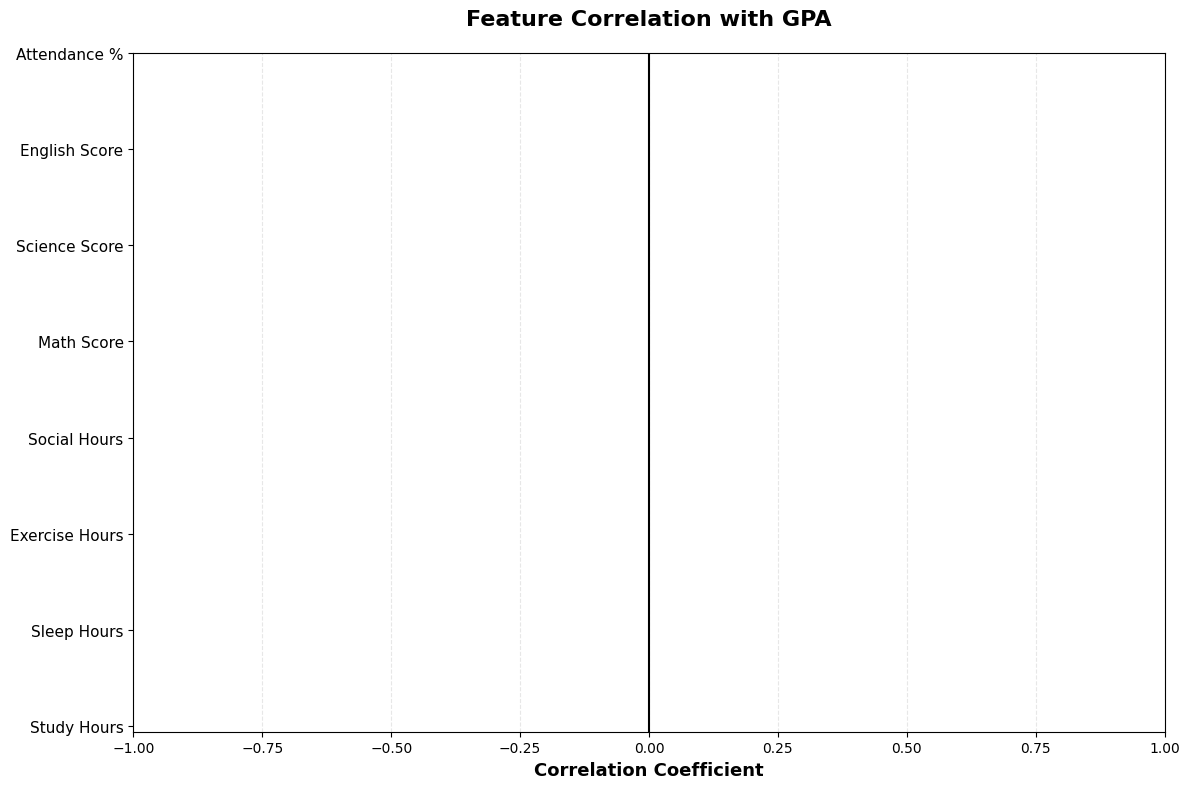


3. Creating Correlation Scatter Plot Matrix...


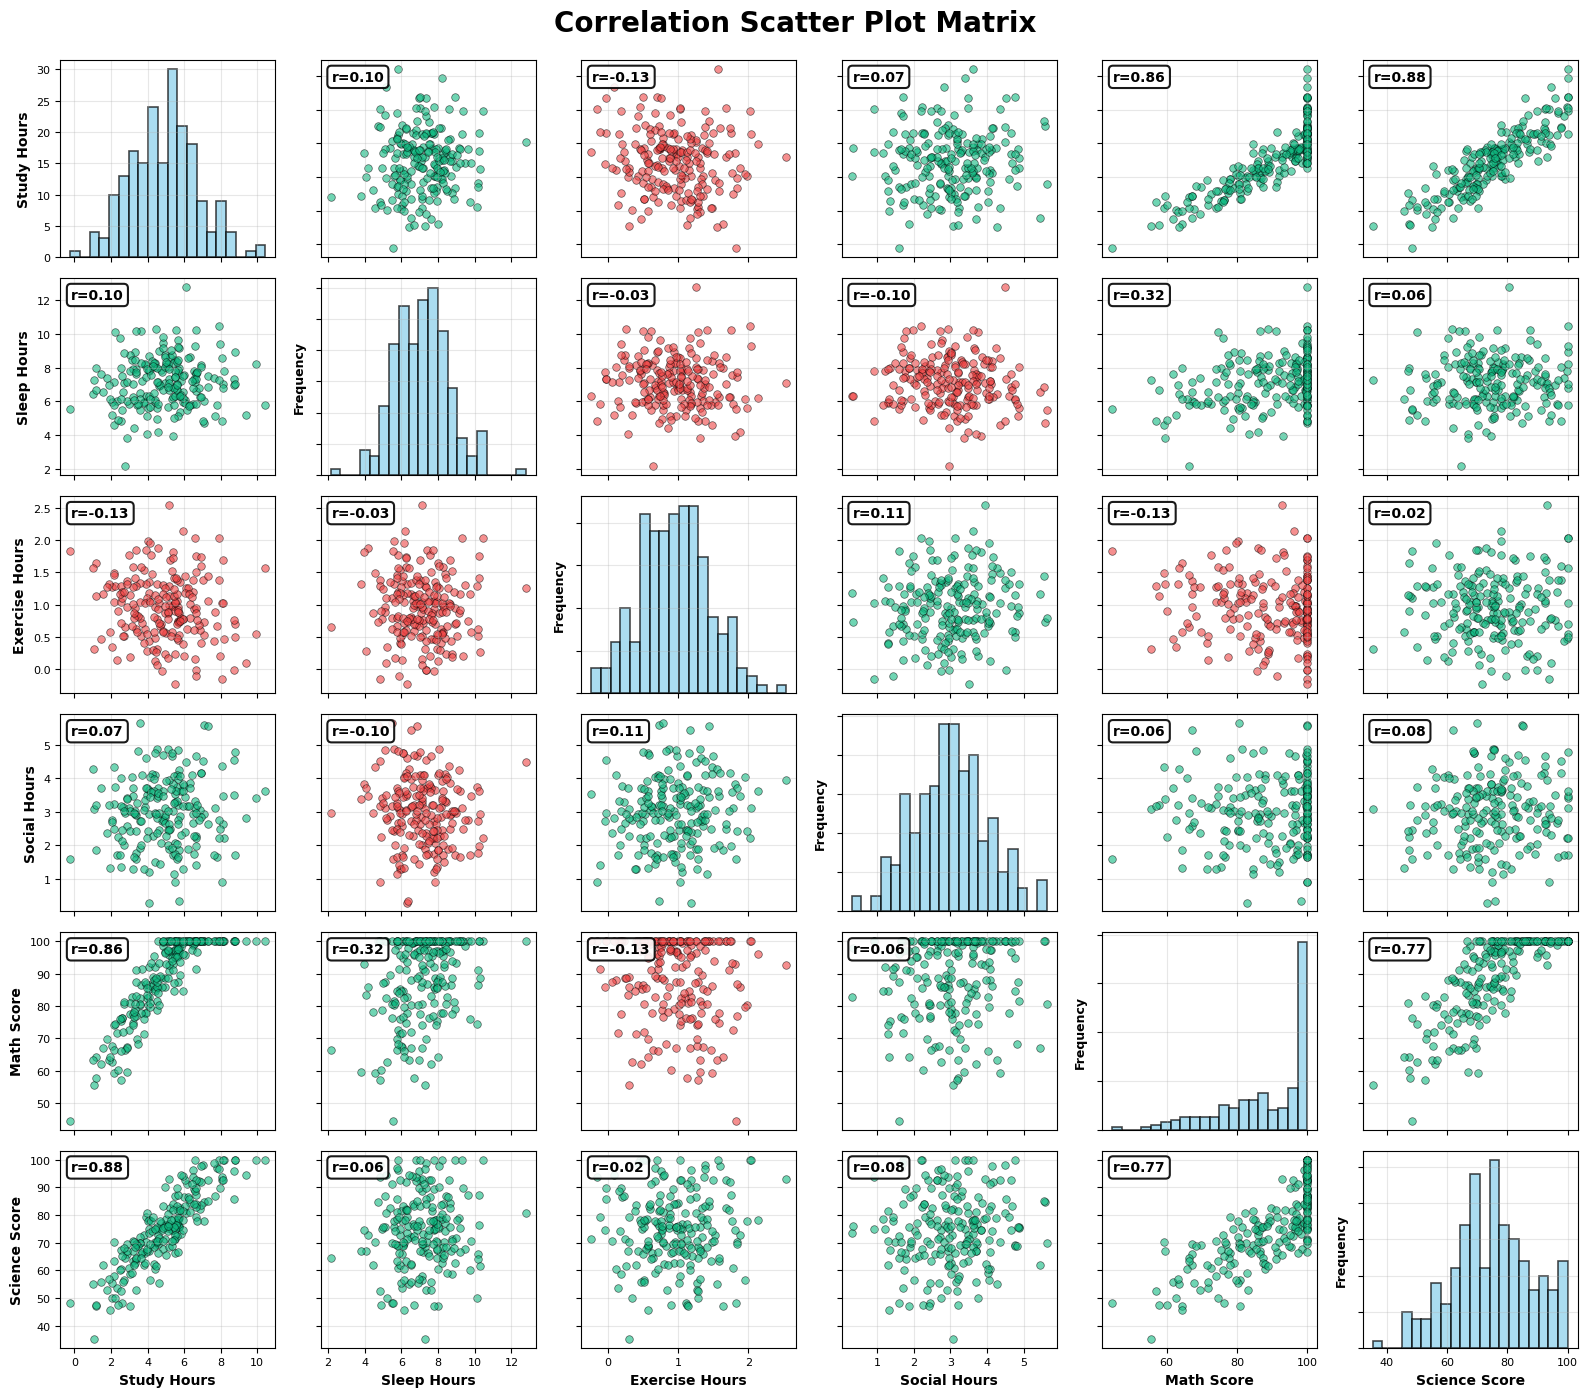


STRONG CORRELATIONS ANALYSIS

🔍 Top 10 Strongest Correlations:
----------------------------------------------------------------------
Study Hours          ↔ Science Score        | +0.877 (Very Strong Positive)
Study Hours          ↔ Math Score           | +0.858 (Very Strong Positive)
Study Hours          ↔ English Score        | +0.793 (Very Strong Positive)
Math Score           ↔ Attendance %         | +0.791 (Very Strong Positive)
Math Score           ↔ Science Score        | +0.773 (Very Strong Positive)
Science Score        ↔ English Score        | +0.721 (Very Strong Positive)
Math Score           ↔ English Score        | +0.709 (Very Strong Positive)
Study Hours          ↔ Attendance %         | +0.637 (Strong Positive)
Science Score        ↔ Attendance %         | +0.541 (Strong Positive)
English Score        ↔ Attendance %         | +0.503 (Strong Positive)

CORRELATION INTERPRETATION GUIDE

📊 CORRELATION COEFFICIENT (r):
   Range: -1.0 to +1.0

   +1.0  = Perfect positive co

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

print("=" * 70)
print("CORRELATION MATRIX VISUALIZATION")
print("=" * 70)

# Generating sample dataset - Student Performance Data
print("\n Generating Sample Dataset: Student Performance Metrics")
print("-" * 70)

np.random.seed(42)
n_students = 200

# Creating correlated data
study_hours = np.random.normal(5, 2, n_students)
sleep_hours = np.random.normal(7, 1.5, n_students)
exercise_hours = np.random.normal(1, 0.5, n_students)
social_hours = np.random.normal(3, 1, n_students)

# Creating dependent variables with correlations
math_score = (study_hours * 8 + sleep_hours * 3 + np.random.normal(0, 5, n_students) + 30).clip(0, 100)
science_score = (study_hours * 7 + exercise_hours * 5 + np.random.normal(0, 6, n_students) + 35).clip(0, 100)
english_score = (study_hours * 6 + social_hours * 4 + np.random.normal(0, 7, n_students) + 40).clip(0, 100)
attendance = (study_hours * 4 + sleep_hours * 2 + np.random.normal(0, 3, n_students) + 70).clip(0, 100)
gpa = ((math_score + science_score + english_score) / 30 + np.random.normal(0, 0.3, n_students)).clip(0, 4)

df_students = pd.DataFrame({
    'Study Hours': study_hours,
    'Sleep Hours': sleep_hours,
    'Exercise Hours': exercise_hours,
    'Social Hours': social_hours,
    'Math Score': math_score,
    'Science Score': science_score,
    'English Score': english_score,
    'Attendance %': attendance,
    'GPA': gpa
})

print(f"Dataset created with {len(df_students)} students and {len(df_students.columns)} features")
print("\nFirst 5 rows:")
print(df_students.head())

print("\n" + "=" * 70)
print("DATASET STATISTICS")
print("=" * 70)
print(df_students.describe().round(2))

# Calculating correlation matrix
correlation_matrix = df_students.corr()

print("\n" + "=" * 70)
print("CORRELATION MATRIX")
print("=" * 70)
print(correlation_matrix.round(3))

# Function to create correlation heatmap (matplotlib only)
def plot_correlation_heatmap(df, title="Correlation Matrix", figsize=(14, 12)):
    """
    Create a beautiful correlation heatmap using only matplotlib
    
    Parameters:
    df: DataFrame
    title: Chart title
    figsize: Figure size
    """
    # Calculating correlation
    corr = df.corr()
    
    # Creating figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create custom colormap (blue-white-red)
    colors = ['#d73027', '#f46d43', '#fdae61', '#fee090', '#ffffff', 
              '#e0f3f8', '#abd9e9', '#74add1', '#4575b4']
    n_bins = 100
    cmap = LinearSegmentedColormap.from_list('correlation', colors, N=n_bins)
    
    # Create heatmap
    im = ax.imshow(corr, cmap=cmap, aspect='auto', vmin=-1, vmax=1, interpolation='nearest')
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Correlation Coefficient', rotation=270, labelpad=20, fontsize=12, fontweight='bold')
    
    # Set ticks
    ax.set_xticks(np.arange(len(corr.columns)))
    ax.set_yticks(np.arange(len(corr.columns)))
    ax.set_xticklabels(corr.columns, rotation=45, ha='right')
    ax.set_yticklabels(corr.columns)
    
    # Add correlation values as text
    for i in range(len(corr.columns)):
        for j in range(len(corr.columns)):
            if i <= j:  # Only lower triangle
                text_color = 'white' if abs(corr.iloc[i, j]) > 0.5 else 'black'
                text = ax.text(j, i, f'{corr.iloc[i, j]:.2f}',
                             ha="center", va="center", color=text_color,
                             fontsize=10, fontweight='bold')
    
    # Add grid
    ax.set_xticks(np.arange(len(corr.columns)) - 0.5, minor=True)
    ax.set_yticks(np.arange(len(corr.columns)) - 0.5, minor=True)
    ax.grid(which="minor", color="gray", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", size=0)
    
    plt.title(title, fontsize=18, fontweight='bold', pad=20)
    plt.tight_layout()
    
    return fig

# Function to plot correlation with specific target
def plot_target_correlation(df, target_column, figsize=(12, 8)):
    """
    Plot correlation of all features with a specific target variable
    
    Parameters:
    df: DataFrame
    target_column: Column name to correlate against
    figsize: Figure size
    """
    # Calculating correlations with target
    correlations = df.corr()[target_column].sort_values(ascending=False)
    correlations = correlations.drop(target_column)  # Remove self-correlation
    
    # Creating color list
    colors = ['#10b981' if x > 0 else '#ef4444' for x in correlations]
    
    # Creating bar plot
    fig, ax = plt.subplots(figsize=figsize)
    
    bars = ax.barh(range(len(correlations)), correlations.values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    ax.set_yticks(range(len(correlations)))
    ax.set_yticklabels(correlations.index, fontsize=11)
    ax.set_xlabel('Correlation Coefficient', fontsize=13, fontweight='bold')
    ax.set_title(f'Feature Correlation with {target_column}', 
                 fontsize=16, fontweight='bold', pad=20)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1.5)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    ax.set_xlim(-1, 1)
    
    # Add value labels
    for i, (bar, val) in enumerate(zip(bars, correlations.values)):
        ax.text(val + (0.03 if val > 0 else -0.03), i, f'{val:.3f}',
                va='center', ha='left' if val > 0 else 'right',
                fontweight='bold', fontsize=11, color='black',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black', linewidth=1))
    
    plt.tight_layout()
    return fig

# Function to create scatter plot matrix for correlations
def plot_correlation_circles(df, title="Correlation Matrix - Circle View", figsize=(14, 12)):
    """
    Create correlation visualization using circles
    
    Parameters:
    df: DataFrame
    title: Chart title
    figsize: Figure size
    """
    corr = df.corr()
    
    fig, ax = plt.subplots(figsize=figsize)
    

    ax.set_facecolor('#f5f5f5')
    
    
    for i in range(len(corr.columns)):
        for j in range(len(corr.columns)):
            if i <= j: 
                corr_val = corr.iloc[i, j]
                
                
                size = abs(corr_val) * 2000
                
                # Color based on positive/negative
                if corr_val > 0:
                    color = plt.cm.Blues(abs(corr_val))
                else:
                    color = plt.cm.Reds(abs(corr_val))
                
                circle = plt.Circle((j, len(corr.columns) - 1 - i), 
                                   radius=np.sqrt(abs(corr_val))/2, 
                                   color=color, alpha=0.8)
                ax.add_patch(circle)
                
                # Adding text for strong correlations
                if abs(corr_val) > 0.3 or i == j:
                    ax.text(j, len(corr.columns) - 1 - i, f'{corr_val:.2f}',
                           ha='center', va='center', fontsize=9, fontweight='bold',
                           color='white' if abs(corr_val) > 0.5 else 'black')
    
    # Setting axis properties
    ax.set_xlim(-0.5, len(corr.columns) - 0.5)
    ax.set_ylim(-0.5, len(corr.columns) - 0.5)
    ax.set_xticks(range(len(corr.columns)))
    ax.set_yticks(range(len(corr.columns)))
    ax.set_xticklabels(corr.columns, rotation=45, ha='right', fontsize=11)
    ax.set_yticklabels(corr.columns[::-1], fontsize=11)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3, linestyle='--')
    
    plt.title(title, fontsize=18, fontweight='bold', pad=20)
    plt.tight_layout()
    
    return fig

# Generating all visualizations
print("\n" + "=" * 70)
print("GENERATING VISUALIZATIONS")
print("=" * 70)

# 1. Standard Correlation Heatmap
print("\n1. Creating Standard Correlation Heatmap...")
fig1 = plot_correlation_heatmap(df_students, 
                                title="Student Performance - Correlation Matrix")
plt.show()

# 2. Target Correlation Bar Plot
print("\n2. Creating Target Correlation Plot (GPA)...")
fig2 = plot_target_correlation(df_students, 'GPA')
plt.show()

# 3. Correlation Scatter Matrix
print("\n3. Creating Correlation Scatter Plot Matrix...")
fig3 = plot_correlation_scatter(df_students)
plt.show()

# Finding strong correlations
print("\n" + "=" * 70)
print("STRONG CORRELATIONS ANALYSIS")
print("=" * 70)

# Getting correlation pairs
corr_matrix = df_students.corr()
corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append({
            'Feature 1': corr_matrix.columns[i],
            'Feature 2': corr_matrix.columns[j],
            'Correlation': corr_matrix.iloc[i, j]
        })

corr_df = pd.DataFrame(corr_pairs)
corr_df = corr_df.sort_values('Correlation', ascending=False, key=abs)

print("\n🔍 Top 10 Strongest Correlations:")
print("-" * 70)
for idx, row in corr_df.head(10).iterrows():
    corr_val = row['Correlation']
    strength = 'Very Strong' if abs(corr_val) > 0.7 else 'Strong' if abs(corr_val) > 0.5 else 'Moderate'
    direction = 'Positive' if corr_val > 0 else 'Negative'
    print(f"{row['Feature 1']:20s} ↔ {row['Feature 2']:20s} | {corr_val:+.3f} ({strength} {direction})")

# Interpretation guide
print("\n" + "=" * 70)
print("CORRELATION INTERPRETATION GUIDE")
print("=" * 70)
print("""
📊 CORRELATION COEFFICIENT (r):
   Range: -1.0 to +1.0

   +1.0  = Perfect positive correlation
   +0.7 to +1.0 = Very strong positive correlation
   +0.5 to +0.7 = Strong positive correlation
   +0.3 to +0.5 = Moderate positive correlation
   +0.1 to +0.3 = Weak positive correlation
    0.0  = No correlation
   -0.1 to -0.3 = Weak negative correlation
   -0.3 to -0.5 = Moderate negative correlation
   -0.5 to -0.7 = Strong negative correlation
   -0.7 to -1.0 = Very strong negative correlation
   -1.0  = Perfect negative correlation

 COLOR SCHEME:
   Blue shades   = Positive correlation (both variables increase together)
   Red shades    = Negative correlation (one increases, other decreases)
   White/Light   = No or weak correlation

""")





